In [13]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [14]:
pi = torch.pi

# Unsqueze makes it (400, 1) rather than just (400,)
x = torch.linspace(-2*pi, 2*pi, 400).unsqueeze(1)
y = torch.sin(x)

print(x.shape, y.shape)

torch.Size([400, 1]) torch.Size([400, 1])


In [15]:
# Now let's create a model to learn this data
model = nn.Sequential(
    nn.Linear(1, 32),
    nn.Tanh(),
    nn.Linear(32, 1)
)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [16]:
# Training Loop
losses = []
predicted_ys = []
for epoch in range(501):
  y_pred = model(x)
  loss = criterion(y, y_pred)

  loss.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print(f"Epoch {epoch}, Loss: {loss.item():.4f}")
    losses.append(loss.item())
    predicted_ys.append(y_pred)

  optimizer.zero_grad()

Epoch 0, Loss: 0.6327
Epoch 100, Loss: 0.0713
Epoch 200, Loss: 0.0497
Epoch 300, Loss: 0.0303
Epoch 400, Loss: 0.0140
Epoch 500, Loss: 0.0051


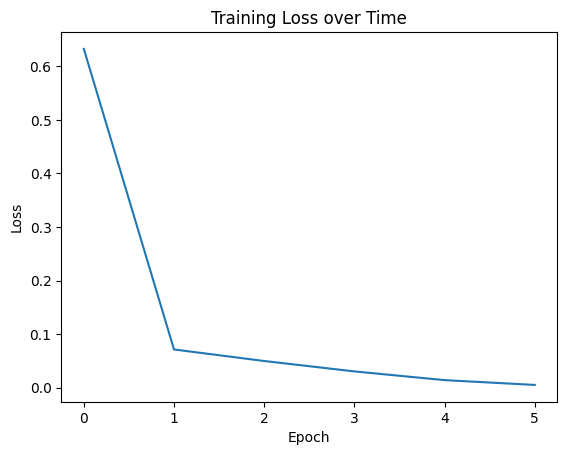

In [17]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Time")
plt.show()

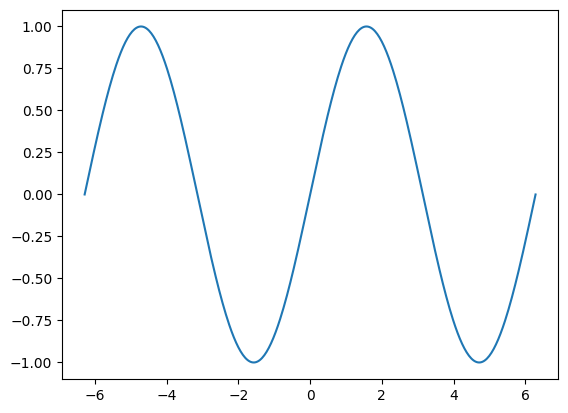

/tmp/ipython-input-4053787355.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


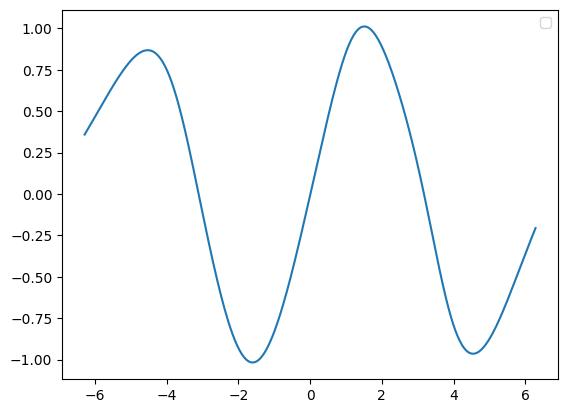

In [24]:
plt.plot(x, y, label="True sin(x)")
plt.show()
n = len(predicted_ys)-1

plt.plot(x, predicted_ys[n].detach().numpy())
plt.legend()
plt.show()